In [9]:
import pandas as pd

integrated_file = '인천광역시_행정구역별_통합데이터.csv'

data = pd.read_csv(integrated_file, encoding='utf-8')
data.tail(10)

,행정구역,총범죄량,총인구수,인구수당범죄율,경찰서수,CCTV수량,가로등수,편의점 개수
0,중구,1783,166354,0.010718,7,1437,61637,154
1,동구,452,58382,0.007742,3,1002,9214,42
2,미추홀구,4227,412534,0.010246,1,3008,30316,249
3,연수구,2816,400174,0.007037,6,1922,53085,211
4,남동구,3876,486663,0.007964,10,2786,54083,217
5,부평구,5391,492193,0.010953,11,2294,31240,195
6,계양구,2163,280623,0.007708,5,2642,26193,177
7,서구,4264,632347,0.006743,8,3734,82318,207
8,강화군,536,69299,0.007735,13,2005,31085,134
9,옹진군,125,20020,0.006244,6,536,10581,34


In [10]:
import pandas as pd
import numpy as np

data_ = data[["경찰서수", "CCTV수량", "가로등수", "편의점 개수", "총인구수", "인구수당범죄율"]]

# 상관 행렬 확인
correlation_matrix = data_[["경찰서수", "CCTV수량", "가로등수", "편의점 개수", "총인구수", "인구수당범죄율"]].corr()

correlation_matrix.tail(6)

,경찰서수,CCTV수량,가로등수,편의점 개수,총인구수,인구수당범죄율
경찰서수,1.000000,0.110141,0.289341,0.075443,0.111736,-0.005142
CCTV수량,0.110141,1.000000,0.618314,0.843639,0.855587,0.114055
가로등수,0.289341,0.618314,1.000000,0.622618,0.676660,0.039525
편의점 개수,0.075443,0.843639,0.622618,1.000000,0.840616,0.379776
총인구수,0.111736,0.855587,0.676660,0.840616,1.000000,0.168203
인구수당범죄율,-0.005142,0.114055,0.039525,0.379776,0.168203,1.000000


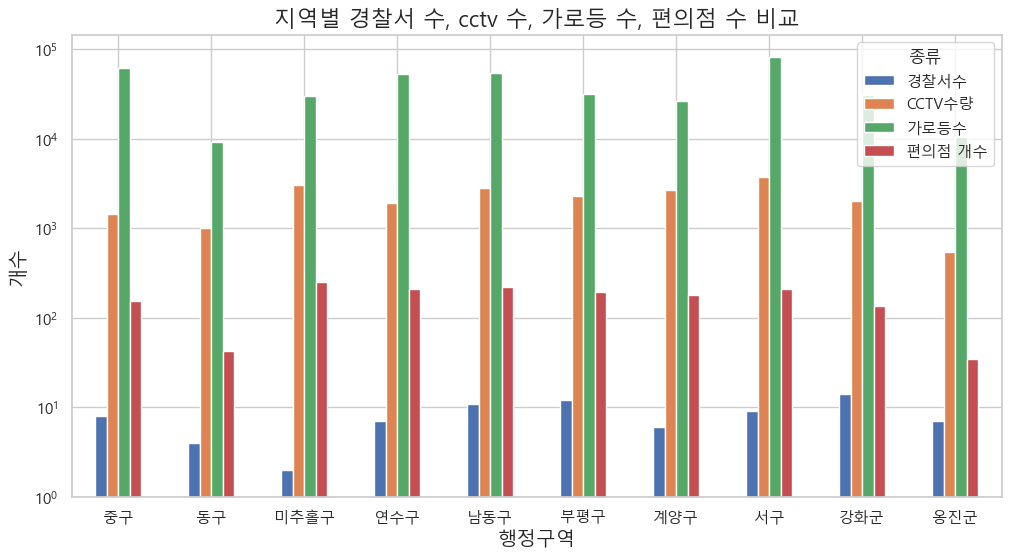

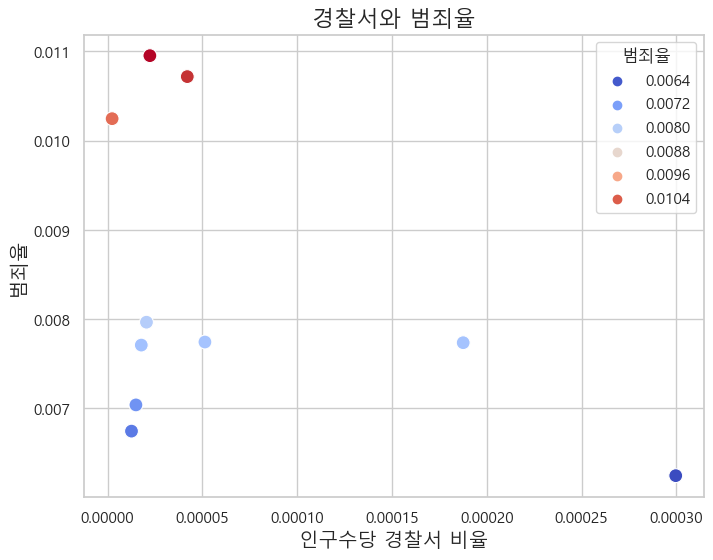

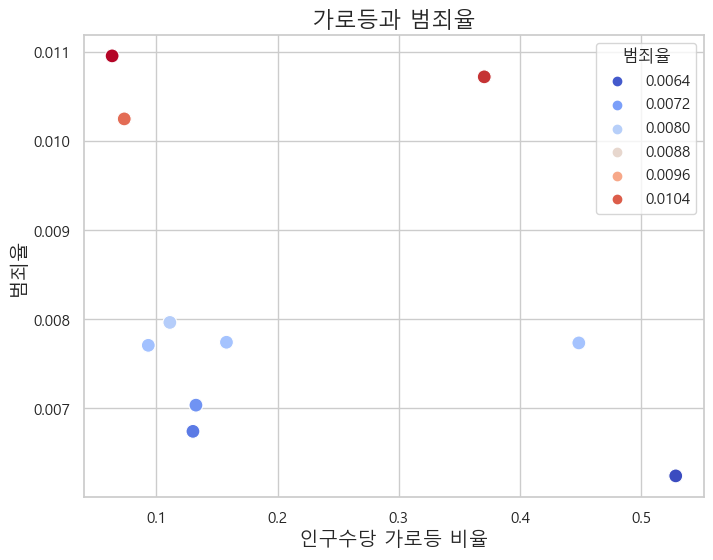

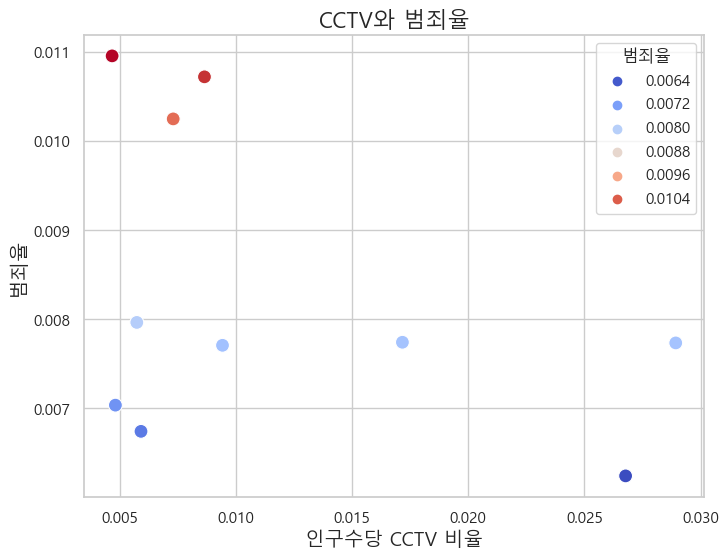

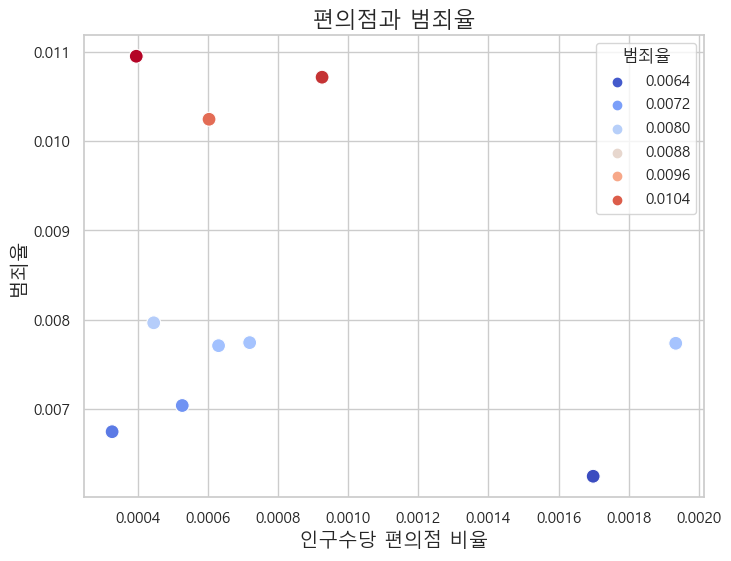

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set(style="whitegrid")

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 행정구역 데이터 추출
region_names = data['행정구역'].values

# 데이터를 DataFrame으로 변환
data_df = pd.DataFrame(data)

# 1. 막대 그래프: 경찰서수, CCTV수량, 가로등수, 편의점 개수
features_to_plot = ['경찰서수', 'CCTV수량', '가로등수', '편의점 개수']
data_plot = data_df[features_to_plot]

# 막대그래프 그리기
ax = data_plot.plot(kind='bar', figsize=(12, 6), log=True)

# x축 레이블을 지역 이름으로 설정
ax.set_xticklabels(region_names, rotation=0)

plt.title('지역별 경찰서 수, cctv 수, 가로등 수, 편의점 수 비교', fontsize=16)
plt.xlabel('행정구역', fontsize=14)
plt.ylabel('개수', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='종류')
plt.show()

# 2. 산점도: 경찰서수와 인구수당범죄율
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['경찰서수'] / data['총인구수'],
    y=data['인구수당범죄율'],
    hue=data['인구수당범죄율'],
    palette='coolwarm',    
    s=100, # 점의 크기
)
plt.title('경찰서와 범죄율', fontsize=16)
plt.xlabel('인구수당 경찰서 비율', fontsize=14)
plt.ylabel('범죄율', fontsize=14)
plt.legend(title='범죄율', loc='upper right')
plt.show()

# 3. 산점도: 가로등수와 인구수당범죄율
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['가로등수'] / data['총인구수'],
    y=data['인구수당범죄율'],
    hue=data['인구수당범죄율'],
    palette='coolwarm',    
    s=100, # 점의 크기
)
plt.title('가로등과 범죄율', fontsize=16)
plt.xlabel('인구수당 가로등 비율', fontsize=14)
plt.ylabel('범죄율', fontsize=14)
plt.legend(title='범죄율', loc='upper right')
plt.show()

# 4. 산점도: CCTV와 인구수당범죄율
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['CCTV수량'] / data['총인구수'],
    y=data['인구수당범죄율'],
    hue=data['인구수당범죄율'],
    palette='coolwarm',
    s=100, # 점의 크기
)
plt.title('CCTV와 범죄율', fontsize=16)
plt.xlabel('인구수당 CCTV 비율', fontsize=14)
plt.ylabel('범죄율', fontsize=14)
plt.legend(title='범죄율', loc='upper right')
plt.show()

# 5. 산점도: 편의점수와 인구수당범죄율
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['편의점 개수'] / data['총인구수'],
    y=data['인구수당범죄율'],
    hue=data['인구수당범죄율'],
    palette='coolwarm',
    s=100, # 점의 크기
)
plt.title('편의점과 범죄율', fontsize=16)
plt.xlabel('인구수당 편의점 비율', fontsize=14)
plt.ylabel('범죄율', fontsize=14)
plt.legend(title='범죄율', loc='upper right')
plt.show()


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from copy import deepcopy

# 데이터 준비
X = data[["경찰서수", "CCTV수량", "가로등수", "편의점 개수", "총인구수"]].values
y = data["인구수당범죄율"].values

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 학습/검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 텐서로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

# 모델 정의
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 16),
    nn.LeakyReLU(),
    nn.Linear(16, 12),
    nn.LeakyReLU(),
    nn.Linear(12, 8),
    nn.LeakyReLU(),
    nn.Linear(8, 4),
    nn.LeakyReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid(),
)

# 학습 설정
epochs = 10000
print_interval = 100
learning_rate = 0.001

lowest_loss = np.inf
best_model = None
lowest_epoch = np.inf

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_history, valid_history = [], []

# 학습 루프
for epoch in range(epochs):
    epoch_loss = 0

    # 예측 및 손실 계산
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)

    # 역전파 및 가중치 업데이트
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()

    # 검증 손실 계산
    with torch.no_grad():
        val_predictions = model(X_val_tensor)
        val_loss = criterion(val_predictions, y_val_tensor).item()
        
    train_history += [epoch_loss]
    valid_history += [val_loss]
        
    if val_loss <= lowest_loss:
        lowest_loss = val_loss
        lowest_epoch = epoch
        
        best_model = deepcopy(model.state_dict())
        
        
    #20번마다 프린트 찍기
    if(epoch+1) % print_interval == 0:
        print('Epoch %d: train loss=%.4e  valid_loss=%.4e  lowest_loss=%.4e' % (epoch + 1,epoch_loss, val_loss, lowest_loss))

print("The best validation loss from epoch %d: %.4e" % (lowest_epoch + 1, lowest_loss))
model.load_state_dict(best_model)

NameError: name 'data' is not defined

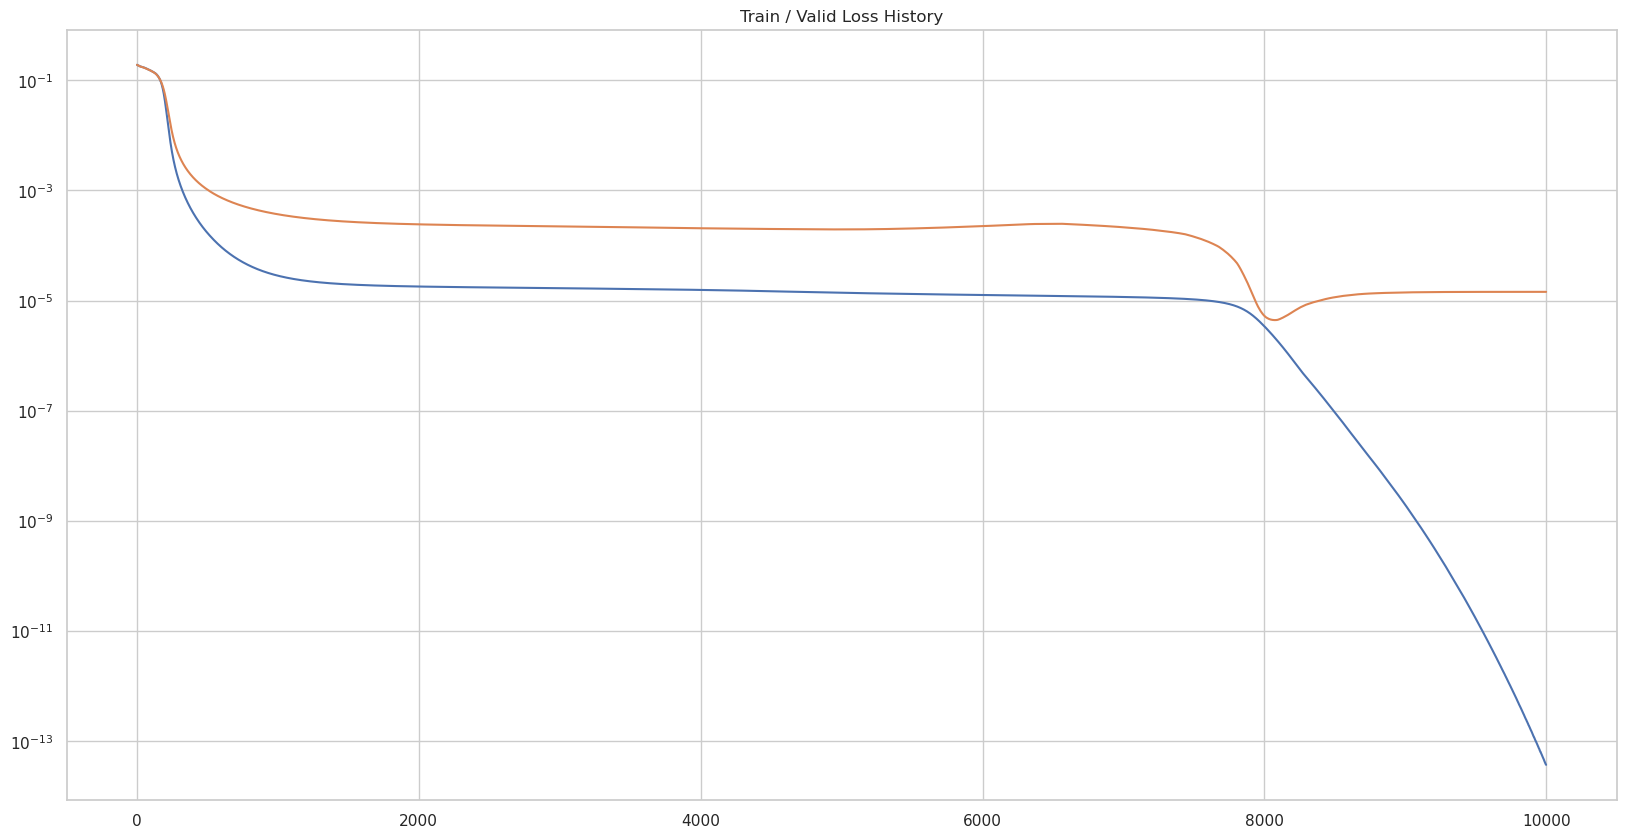

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 변경
plt.rcParams['font.family'] = 'DejaVu Sans'

# 유니코드 마이너스 대신 일반 하이픈 사용
mpl.rcParams['axes.unicode_minus'] = False

plot_from = 0
plt.figure(figsize=(20, 10))
plt.grid(True)
plt.title("Train / Valid Loss History")
plt.plot(range(plot_from, len(train_history)), train_history[plot_from:], label = 'Train Loss')
plt.plot(range(plot_from, len(valid_history)), valid_history[plot_from:], label = 'Valid Loss')
plt.yscale('log')
plt.show()

In [14]:
# 범죄 예측률 정확성 확인 
import torch
from sklearn.preprocessing import StandardScaler
import numpy as np

# 필요한 컬럼만 추출
features = data[['경찰서수', 'CCTV수량', '가로등수', '편의점 개수', '총인구수']].values
labels = data['인구수당범죄율'].values

# 데이터 표준화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 데이터를 Tensor로 변환
features_tensor = torch.tensor(features_scaled, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.float32)

# 모델 예측과 실제 값을 비교
with torch.no_grad():
    predictions = model(features_tensor).squeeze()  # 모델 예측 값 (텐서)
    predictions_np = predictions.numpy()  # NumPy 배열로 변환
    labels_np = labels_tensor.numpy()  # 실제 범죄율 (NumPy 배열)

# 결과 출력
print("실제 범죄율과 모델 예측 범죄율 비교:")
for i, (actual, predicted) in enumerate(zip(labels_np, predictions_np)):
    print(f"샘플 {i+1}: 실제 범죄율 = {actual:.4f}, 예측 범죄율 = {predicted:.4f}")

# 평균 오차 계산
errors = labels_np - predictions_np
mean_error = np.mean(np.abs(errors))
print(f"\n평균 절대 오차: {mean_error:.4f}")

실제 범죄율과 모델 예측 범죄율 비교:
샘플 1: 실제 범죄율 = 0.0107, 예측 범죄율 = 0.0104
샘플 2: 실제 범죄율 = 0.0077, 예측 범죄율 = 0.0048
샘플 3: 실제 범죄율 = 0.0102, 예측 범죄율 = 0.0081
샘플 4: 실제 범죄율 = 0.0070, 예측 범죄율 = 0.0084
샘플 5: 실제 범죄율 = 0.0080, 예측 범죄율 = 0.0075
샘플 6: 실제 범죄율 = 0.0110, 예측 범죄율 = 0.0105
샘플 7: 실제 범죄율 = 0.0077, 예측 범죄율 = 0.0104
샘플 8: 실제 범죄율 = 0.0067, 예측 범죄율 = 0.0066
샘플 9: 실제 범죄율 = 0.0077, 예측 범죄율 = 0.0072
샘플 10: 실제 범죄율 = 0.0062, 예측 범죄율 = 0.0047

평균 절대 오차: 0.0013


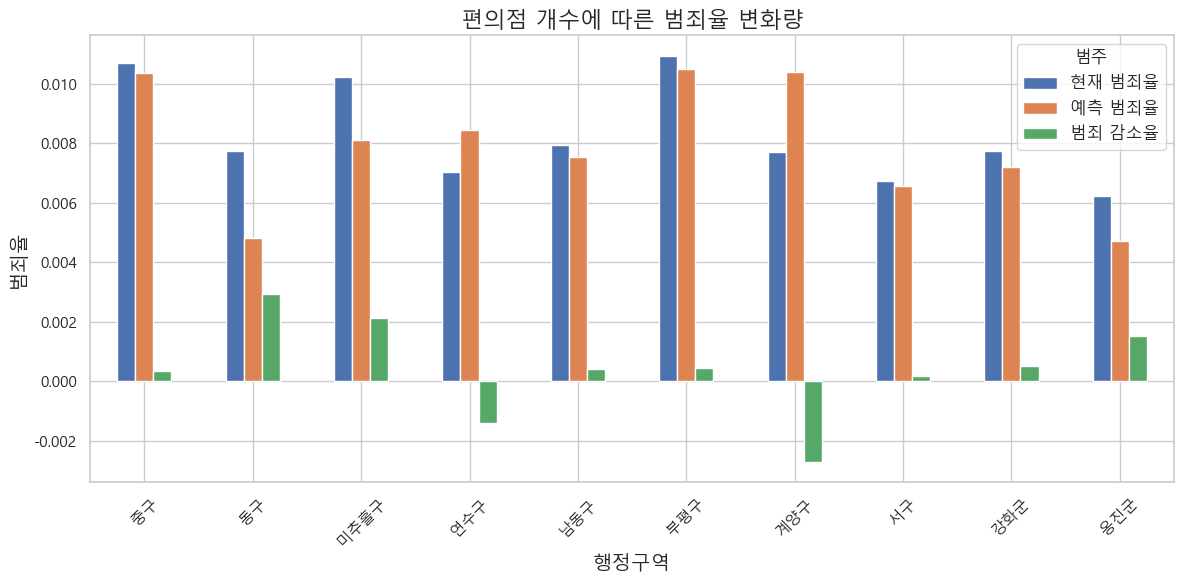

In [15]:
import torch
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 추출
region_names = data['행정구역'].values
features = data[['경찰서수', 'CCTV수량', '가로등수', '편의점 개수', '총인구수']].values
labels = data['인구수당범죄율'].values

# NumPy 배열로 변환 및 float32 타입으로 변경
features = features.astype(np.float32)

# '편의점 개수' 열만 1.1배 조정 (3번째 열)
features[:, 3] *= 1.1

# 종속 변수
labels = data['인구수당범죄율'].values

# 데이터 표준화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 데이터를 Tensor로 변환
features_tensor = torch.tensor(features_scaled, dtype=torch.float32)

# 모델 예측
with torch.no_grad():
    predictions = model(features_tensor).squeeze()
    predictions_np = predictions.numpy()

# 결과 DataFrame 생성
results = pd.DataFrame({
    '행정구역': region_names,
    '현재 범죄율': labels,
    '예측 범죄율': predictions_np,
    '범죄 감소율': labels - predictions_np
})

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 막대그래프 그리기
results.set_index('행정구역')[['현재 범죄율', '예측 범죄율', '범죄 감소율']].plot(kind='bar', figsize=(12, 6))

plt.title('편의점 개수에 따른 범죄율 변화량', fontsize=16)
plt.xlabel('행정구역', fontsize=14)
plt.ylabel('범죄율', fontsize=14)
plt.xticks(rotation=45)  # x축 라벨 회전
plt.legend(title='범주', fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()